In [1]:
%%time

!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 kB 36.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 74.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.3/269.3 kB 37.4 MB/s eta 0:00:00
CPU times: user 100 ms, sys: 18.9 ms, total: 119 ms
Wall time: 15.1 s


In [2]:
%%time

from datasets import get_dataset_split_names, load_dataset, load_dataset_builder

ds_builder = load_dataset_builder('sst')
print ('Dataset Description :-', ds_builder.info.description, '\n')
print ('Dataset Information Features :-', ds_builder.info.features, '\n')

print ('Types of datasets :-', get_dataset_split_names('sst'), '\n')

train_dataset = load_dataset('sst', split='train')
validation_dataset = load_dataset('sst', split='validation')
test_dataset = load_dataset('sst', split='test')
print ('Train dataset :-', train_dataset, '\n')
print ('Validation dataset :-', validation_dataset, '\n')
print ('Test Dataset :-', test_dataset, '\n')

print ('Datatype of the datasets :-', type(train_dataset))

Dataset Description :- The Stanford Sentiment Treebank, the first corpus with fully labeled parse trees that allows for a
complete analysis of the compositional effects of sentiment in language.
 

Dataset Information Features :- {'sentence': Value(dtype='string', id=None), 'label': Value(dtype='float32', id=None), 'tokens': Value(dtype='string', id=None), 'tree': Value(dtype='string', id=None)} 



Types of datasets :- ['train', 'validation', 'test'] 



Generating train split:   0%|          | 0/8544 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1101 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2210 [00:00<?, ? examples/s]

Dataset sst downloaded and prepared to /root/.cache/huggingface/datasets/sst/default/1.0.0/b8a7889ef01c5d3ae8c379b84cc4080f8aad3ac2bc538701cbe0ac6416fb76ff. Subsequent calls will reuse this data.


Train dataset :- Dataset({
    features: ['sentence', 'label', 'tokens', 'tree'],
    num_rows: 8544
}) 

Validation dataset :- Dataset({
    features: ['sentence', 'label', 'tokens', 'tree'],
    num_rows: 1101
}) 

Test Dataset :- Dataset({
    features: ['sentence', 'label', 'tokens', 'tree'],
    num_rows: 2210
}) 

Datatype of the datasets :- <class 'datasets.arrow_dataset.Dataset'>
CPU times: user 5.8 s, sys: 533 ms, total: 6.33 s
Wall time: 31.3 s


In [3]:
%%time

# Exploring the format of the datasets

print ('1st entry in the train dataset :-', train_dataset[0])
print ('Type of the 1st entry in the train dataset :-', type(train_dataset[0]))
print ('\nNumber of entries in the trainset :', len(train_dataset))
print ('Number of entries in the validation set :', len(validation_dataset))
print ('Number of entries in the test set :', len(test_dataset))

1st entry in the train dataset :- {'sentence': "The Rock is destined to be the 21st Century 's new `` Conan '' and that he 's going to make a splash even greater than Arnold Schwarzenegger , Jean-Claud Van Damme or Steven Segal .", 'label': 0.6944400072097778, 'tokens': "The|Rock|is|destined|to|be|the|21st|Century|'s|new|``|Conan|''|and|that|he|'s|going|to|make|a|splash|even|greater|than|Arnold|Schwarzenegger|,|Jean-Claud|Van|Damme|or|Steven|Segal|.", 'tree': '70|70|68|67|63|62|61|60|58|58|57|56|56|64|65|55|54|53|52|51|49|47|47|46|46|45|40|40|41|39|38|38|43|37|37|69|44|39|42|41|42|43|44|45|50|48|48|49|50|51|52|53|54|55|66|57|59|59|60|61|62|63|64|65|66|67|68|69|71|71|0'}
Type of the 1st entry in the train dataset :- <class 'dict'>

Number of entries in the trainset : 8544
Number of entries in the validation set : 1101
Number of entries in the test set : 2210
CPU times: user 367 µs, sys: 937 µs, total: 1.3 ms
Wall time: 1.17 ms


In [4]:
%%time

import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


CPU times: user 891 ms, sys: 187 ms, total: 1.08 s
Wall time: 2.62 s


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
%%time

from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize

# Segregating the train, validation and test datasets

'''
Map POS tag to 1st character lemmatize() accepts
'''
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {'J' : wordnet.ADJ, 'N' : wordnet.NOUN, 'V' : wordnet.VERB, 'R' : wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)


lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))


'''
Steps followed :-
(1) Word-Level Tokenization
(2) Removal of Stopwords
(3) Lemmatization
'''
def generate_X_y_datasets(dataset):
    X, y = [], []
    for data in dataset:
        sentence, sentence_label = data['sentence'], data['label']
        text_tokens = word_tokenize(sentence)
        tokens_without_stopwords = [word for word in text_tokens if not word in stopwords.words()]
        sentence_without_stopwords = (' ').join(tokens_without_stopwords)
        tokens = word_tokenize(sentence_without_stopwords)
        lemmatized_sentence_list = [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in tokens]
        lemmatized_sentence = (' ').join(lemmatized_sentence_list)
        X.append(lemmatized_sentence)
        if sentence_label >= 0.5:
            y.append(1.0)
        else:
            y.append(0.0)
    return X, y


X_train, y_train = generate_X_y_datasets(train_dataset)
X_validation, y_validation = generate_X_y_datasets(validation_dataset)
X_test, y_test = generate_X_y_datasets(test_dataset)

CPU times: user 13min 36s, sys: 1min 28s, total: 15min 4s
Wall time: 15min 18s


In [6]:
%%time

'''
Saving the above generated data so that we don't need to reload again and again - it took a freaking 
hour!!!
'''

file1 = open('X_train.txt', 'w')
for line in X_train:
    file1.write(line + '\n')
file1.close()

file2 = open('y_train.txt', 'w')
for line in y_train:
    file2.write(str(line) + '\n')
file2.close()

file3 = open('X_validation.txt', 'w')
for line in X_validation:
    file3.write(line + '\n')
file3.close()

file4 = open('y_validation.txt', 'w')
for line in y_validation:
    file4.write(str(line) + '\n')
file4.close()

file5 = open('X_test.txt', 'w')
for line in X_test:
    file5.write(line + '\n')
file5.close()

file6 = open('y_test.txt', 'w')
for line in y_test:
    file6.write(str(line) + '\n')
file6.close()

CPU times: user 14.1 ms, sys: 902 µs, total: 15 ms
Wall time: 20.4 ms


In [7]:
%%time

'''
Creating a mapping from word index to a specific word
'''
def create_trainset_mappings(dataset):
    vocabulary = {}
    vocabulary['<PAD>'] = 0
    vocabulary['<UNK>'] = 1
    index = 2
    for sentence in dataset:
        for word in sentence.split():
            if word not in vocabulary:
                vocabulary[word] = index
                index += 1
    return vocabulary
    

train_vocabulary = create_trainset_mappings(X_train)
print ('Size of the vocabulary of the train dataset :', len(train_vocabulary))

Size of the vocabulary of the train dataset : 15434
CPU times: user 25.3 ms, sys: 0 ns, total: 25.3 ms
Wall time: 27.3 ms


In [8]:
%%time

'''
Creating corresponding mappings for validation and test data on the basis of the mappings 
created for the train dataset
'''
def create_mapped_dataset(train_vocab, dataset):
    mapped_dataset = []
    max_sentence_len = 0
    for sentence in dataset:
        mapped_sentence = []
        for word in sentence.split():
            if word not in train_vocab:
                mapped_sentence.append(train_vocab['<UNK>'])
            else:
                mapped_sentence.append(train_vocab[word])
        mapped_dataset.append(mapped_sentence)
        max_sentence_len = max(max_sentence_len, len(mapped_sentence))
    return mapped_dataset, max_sentence_len


train_mapped_dataset, max_train_sentence_len = create_mapped_dataset(train_vocabulary, X_train) 
validation_mapped_dataset, max_validation_sentence_len = create_mapped_dataset(train_vocabulary, X_validation)
test_mapped_dataset, max_test_sentence_len = create_mapped_dataset(train_vocabulary, X_test)
print ('Maximum Length of a sentence in the train data :', max_train_sentence_len)
print ('Maximum Length of a sentence in the validation data :', max_validation_sentence_len)
print ('Maximum Length of a sentence in the test data :', max_test_sentence_len)
max_sentence_len = max(max_train_sentence_len, max(max_validation_sentence_len, max_test_sentence_len))
print ('Maximum Length of a sentence in the entire data :', max_sentence_len)

Maximum Length of a sentence in the train data : 34
Maximum Length of a sentence in the validation data : 29
Maximum Length of a sentence in the test data : 27
Maximum Length of a sentence in the entire data : 34
CPU times: user 62.9 ms, sys: 2.58 ms, total: 65.5 ms
Wall time: 69.6 ms


In [9]:
%%time

# Padding for each of the sentences in the train, validation and test datasets

def create_padded_dataset(dataset, max_len):
    padded_dataset = []
    for data in dataset:
        temp_list = data
        while len(temp_list) < max_len:
            temp_list.insert(0, 0)
        padded_dataset.append(temp_list) 
    return padded_dataset

normal_train_data = create_padded_dataset(train_mapped_dataset, max_sentence_len)
normal_validation_data = create_padded_dataset(validation_mapped_dataset, max_sentence_len)
normal_test_data = create_padded_dataset(test_mapped_dataset, max_sentence_len)

CPU times: user 61.5 ms, sys: 1.07 ms, total: 62.6 ms
Wall time: 64.9 ms


In [10]:
%%time

import torch

device = 'cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu'
train_on_gpu = torch.cuda.is_available()

CPU times: user 1.34 s, sys: 232 ms, total: 1.57 s
Wall time: 3.67 s


In [24]:
%%time

from torchtext.vocab import GloVe

'''
Creating the pre-trained embeddings matrix
'''
def generate_pretrained_embedding_matrix(vocab, embedding_dim):
    embedding_matrix = torch.zeros((len(vocab), embedding_dim))
    for word, index in vocab.items():
        if word in glove.stoi:
            embedding_matrix[index] = glove.vectors[glove.stoi[word]]
    return embedding_matrix.detach().clone()


glove = GloVe(name='6B', dim=100)
embedding_matrix = generate_pretrained_embedding_matrix(train_vocabulary, 100)
print ('Shape of the generated embedding matrix: ', embedding_matrix.shape)

100%|█████████▉| 399999/400000 [00:18<00:00, 21481.10it/s]


Shape of the generated embedding matrix:  torch.Size([15434, 100])
CPU times: user 18.7 s, sys: 668 ms, total: 19.3 s
Wall time: 20.1 s


In [25]:
%%time

import numpy as np
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch.optim as optim



'''
The architecture consists of 2 stacked layers of Bi-Directional LSTM units. Each layer is a Bi-LSTM, 
which means that the input sequence is processed in both forward and backward directions by a set of LSTM units. 
The output of each LSTM unit at each time step is concatenated to form a single output vector.

In a stacked Bi-LSTM, the output of the 1st layer of Bi-LSTM units is fed as input to the 2nd layer of 
Bi-LSTM units, which in turn, allows the 2nd layer to learn a more complex representation of the input 
sequence by taking into account the outputs of the 1st layer. The final output of the stacked Bi-LSTM 
architecture is the concatenation of the output vectors from the forward and backward LSTM units at the 
top layer.

By stacking multiple layers of Bi-LSTM, the model can learn increasingly abstract representations of the input 
sequence.
'''
class ELMo(nn.Module):
    '''
    The embedding layer maps each word in the vocabulary to a dense vector of the specified embedding dimension and since pre-trained word embeddings are available 
    (here, GloVe), the embedding layer weights are initialized with these embeddings.

    Bi-Directional LSTMs are used to obtain embeddings for each word in the input 
    sentence.

    The attention weights are used to weigh the embeddings obtained at each layer of 
    the ELMo network and are initialized with Xavier initialization.

    The output layer maps the final ELMo embeddings to the specified number of classes. 
    '''
    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_layers, dropout, embedding_matrix):
        super(ELMo, self).__init__()
        self.num_layers = num_layers
        self.hidden_dim = hidden_dim
        self.dropout = dropout
        self.s1 = nn.Parameter(torch.rand(1))
        self.s2 = nn.Parameter(torch.rand(1))
        self.s3 = nn.Parameter(torch.rand(1))
        self.gamma = nn.Parameter(torch.rand(1))
        # Pre-Trained Embeddings from GloVe -> (34, 100)
        self.embedding = nn.Embedding.from_pretrained(embedding_matrix)
        self.embedding.weight = nn.Parameter(self.embedding.weight, requires_grad=True) 
        # Bi-LSTM Layers
        self.lstm1 = nn.LSTM(embedding_dim, hidden_dim, bidirectional=True, batch_first=True) #(34, 100)
        self.lstm2 = nn.LSTM(hidden_dim * 2, hidden_dim, bidirectional=True, batch_first=True) #(34, 100)
        # Dropout
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(2 * hidden_dim, vocab_size)
        self.sigmoid = nn.Sigmoid()
    
    '''
    Firstly, the input sentence is passed through the embedding layer to 
    obtain the embeddings for each word. 
    
    Then these embeddings are passed through the Bi-Directional LSTM layers 
    to obtain embeddings for each word at each layer of the ELMo network.
    
    The attention weights are calculated using a softmax function and these 
    very weights are used to obtain a weighted average of the embeddings 
    obtained at each layer.
    
    The final ELMo emeddings are passed through the output layer to obtain the 
    output of the model.
    '''
    def forward(self, input_sentence):
        # Embedding Layer
        embedded = self.embedding(input_sentence)
        # Bidirectional LSTM 1
        lstm1_out, _ = self.lstm1(embedded)
        lstm1_out = self.dropout(lstm1_out)
        # Bidirectional LSTM 2
        lstm2_out, _ = self.lstm2(lstm1_out)
        lstm2_out = self.dropout(lstm2_out)
        # Fully Connected Layer
        out = self.fc(lstm2_out)
        # Elmo embedding layer
        final_embeddings = self.gamma * (self.s1 * embedded + self.s2 * lstm1_out + self.s3 * lstm2_out)
        final_embeddings = final_embeddings.to(device)
        out = out.to(device)
        return final_embeddings, out
        

CPU times: user 57 µs, sys: 0 ns, total: 57 µs
Wall time: 62 µs


In [32]:
%%time

'''
Creating ELMo embeddings for each of the mapped sentences present in the train, 
validation and test datasets
'''
def generate_elmo_embeddings(data, vocab_size, type):
    elmo_embeddings = []
    embedding_dim = 100
    hidden_dim = 50
    num_layers = 2
    dropout = 0.2
    epochs = 20
    learning_rate = 1e-2
    elmo = ELMo(vocab_size, embedding_dim, hidden_dim, num_layers, dropout, embedding_matrix)
    elmo = elmo.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(elmo.parameters(), lr=learning_rate)
    for i, sentence in enumerate(data):
        elmo_input = torch.tensor(sentence, dtype=torch.long).to(device)
        embeddings = None
        for epoch in range(epochs):
            optimizer.zero_grad()
            embeddings, output = elmo(elmo_input)
            output = output.view(-1, vocab_size)
            loss = criterion(output, elmo_input)
            loss.backward()
            optimizer.step()
            if i % 1000 == 0:
                print ('Epoch :', epoch, 'Index :', i, 'Loss :', loss.item())
        elmo_embeddings.append(embeddings)
    if type == 'train':
        torch.save(elmo.state_dict(), 'elmo_embeddings.pt')
    return elmo_embeddings


vocab_size = len(train_vocabulary)
vocab_sentence = []
for word in train_vocabulary.keys():
    vocab_sentence.append(train_vocabulary[word])


train_elmo_embeddings = generate_elmo_embeddings(normal_train_data, vocab_size, 'train')
validation_elmo_embeddings = generate_elmo_embeddings(normal_validation_data, vocab_size, 'validation')
test_elmo_embeddings = generate_elmo_embeddings(normal_test_data, vocab_size, 'test')
vocab_sentence_embeddings = generate_elmo_embeddings([vocab_sentence], vocab_size, 'None')

Epoch : 0 Index : 0 Loss : 9.648225784301758
Epoch : 1 Index : 0 Loss : 9.417222023010254
Epoch : 2 Index : 0 Loss : 8.843520164489746
Epoch : 3 Index : 0 Loss : 7.516077041625977
Epoch : 4 Index : 0 Loss : 5.599133014678955
Epoch : 5 Index : 0 Loss : 3.8365609645843506
Epoch : 6 Index : 0 Loss : 2.854072093963623
Epoch : 7 Index : 0 Loss : 2.5081381797790527
Epoch : 8 Index : 0 Loss : 2.386232376098633
Epoch : 9 Index : 0 Loss : 2.3321595191955566
Epoch : 10 Index : 0 Loss : 2.3323974609375
Epoch : 11 Index : 0 Loss : 2.244647741317749
Epoch : 12 Index : 0 Loss : 2.1808314323425293
Epoch : 13 Index : 0 Loss : 2.228841781616211
Epoch : 14 Index : 0 Loss : 2.211003065109253
Epoch : 15 Index : 0 Loss : 2.066908597946167
Epoch : 16 Index : 0 Loss : 1.9623076915740967
Epoch : 17 Index : 0 Loss : 2.002472400665283
Epoch : 18 Index : 0 Loss : 2.132350206375122
Epoch : 19 Index : 0 Loss : 1.938360333442688
Epoch : 0 Index : 1000 Loss : 5.662277698516846
Epoch : 1 Index : 1000 Loss : 5.3652982

In [33]:


%%time

from google.colab import files
import pickle

'''
Saving the obtained ELMo embeddings so that I don't have to sacrifice 2 hours of my life needlessly again!
'''

with open('vocab_elmo_embeddings.data', 'wb') as f:
    pickle.dump(vocab_sentence_embeddings, f)

files.download('elmo_embeddings.pt')
files.download('vocab_elmo_embeddings.data')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

CPU times: user 12.7 ms, sys: 9.07 ms, total: 21.7 ms
Wall time: 28.9 ms


In [34]:
%%time

from torch.utils.data import DataLoader, TensorDataset

# Creating DataLoader objects for the Sentiment Analysis classification model

train_data = TensorDataset(torch.stack(train_elmo_embeddings), torch.tensor(y_train))
validation_data = TensorDataset(torch.stack(validation_elmo_embeddings), torch.tensor(y_validation))
test_data = TensorDataset(torch.stack(test_elmo_embeddings), torch.tensor(y_test))
batch_size = 64
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
validation_loader = DataLoader(validation_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

CPU times: user 24.1 ms, sys: 0 ns, total: 24.1 ms
Wall time: 26 ms


In [35]:
%%time


class SentimentAnalysis(nn.Module):

    def __init__(self, vocab_size, embedding_dim):
        super(SentimentAnalysis, self).__init__()
        self.fc = nn.Linear(embedding_dim, 2)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.fc(x)
        out = out.mean(dim=1)
        out = self.sigmoid(out)
        return out

CPU times: user 27 µs, sys: 0 ns, total: 27 µs
Wall time: 28.8 µs


In [36]:
%%time

# Training the SentimentAnalysis classifier
sentiment_analysis_model = SentimentAnalysis(len(train_vocabulary), 100)
sentiment_analysis_model = sentiment_analysis_model.to(device)
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(sentiment_analysis_model.parameters(), lr=1e-2)
print (sentiment_analysis_model)

SentimentAnalysis(
  (fc): Linear(in_features=100, out_features=2, bias=True)
  (sigmoid): Sigmoid()
)
CPU times: user 1.21 ms, sys: 11 µs, total: 1.22 ms
Wall time: 1.1 ms


Epoch : 0 , Accuracy : 0.8102762172284644
Epoch : 1 , Accuracy : 0.8359082397003745
Epoch : 2 , Accuracy : 0.8422284644194756
Epoch : 3 , Accuracy : 0.8452715355805244
Epoch : 4 , Accuracy : 0.8467930711610487
Epoch : 5 , Accuracy : 0.8469101123595506
Epoch : 6 , Accuracy : 0.8472612359550562
Epoch : 7 , Accuracy : 0.848314606741573
Epoch : 8 , Accuracy : 0.8487827715355806
Epoch : 9 , Accuracy : 0.8496020599250936
Epoch : 10 , Accuracy : 0.849250936329588
Epoch : 11 , Accuracy : 0.8507724719101124
Epoch : 12 , Accuracy : 0.8494850187265918
Epoch : 13 , Accuracy : 0.8510065543071161
Epoch : 14 , Accuracy : 0.8507724719101124
Epoch : 15 , Accuracy : 0.8508895131086143
Epoch : 16 , Accuracy : 0.8525280898876404
Epoch : 17 , Accuracy : 0.8535814606741573
Epoch : 18 , Accuracy : 0.8527621722846442
Epoch : 19 , Accuracy : 0.8527621722846442


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

CPU times: user 18.6 s, sys: 278 ms, total: 18.9 s
Wall time: 18.6 s


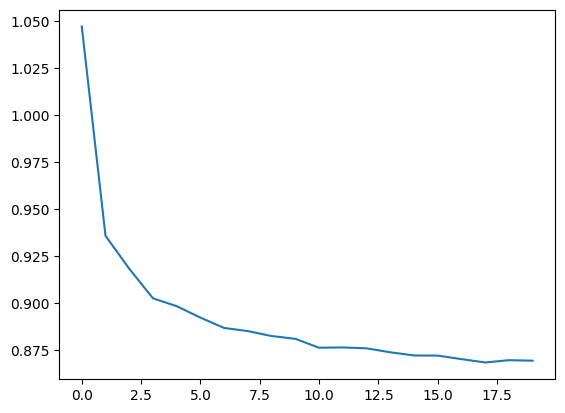

In [37]:
%%time

from matplotlib import pyplot as plt 

epochs = 20
losses = []

for epoch in range(epochs):
    train_loss = 0
    correct = 0
    for batch_idx, batch in enumerate(train_loader):
        input = batch[0].to(device)
        input = input.detach()
        target = batch[1].to(device)
        optimizer.zero_grad()
        out = sentiment_analysis_model(input)
        y_pred = torch.argmax(out, dim=1).to(device)
        target1 = []
        for i, j in enumerate(target):
            if j == 0:
                if y_pred[i] == 0:
                    correct += 1
                target1.append(torch.tensor([1.0, 0.0]))
            else:
                if y_pred[i] == 1:
                    correct += 1
                target1.append(torch.tensor([0.0, 1.0]))
        target1 = torch.stack(target1).to(device)
        loss = loss_fn(out, target1)
        train_loss += loss.item()
        loss.backward()
        optimizer.step()
    losses.append(train_loss / 64)
    print ('Epoch :', epoch, ', Accuracy :', (correct / len(y_train)))

plt.plot(losses)
torch.save(sentiment_analysis_model.state_dict(), 'sst_model.pt')
files.download('sst_model.pt')

In [38]:
%%time

num_correct = 0
validation_predictions = []

with torch.no_grad():
    for batch_idx, batch in enumerate(validation_loader):
        input = batch[0].to(device)
        input = input.detach()
        target = batch[1].to(device)
        out = sentiment_analysis_model(input)
        y_pred = torch.argmax(out, dim=1).to(device)
        for i, j in enumerate(target):
            if j == 0:
                if y_pred[i] == 0:
                    num_correct += 1
            else:
                if y_pred[i] == 1:
                    num_correct += 1
            validation_predictions.append(y_pred[i])
    
print ('Validation Accuracy :', (num_correct / len(y_validation)))

Validation Accuracy : 0.5095367847411444
CPU times: user 91.8 ms, sys: 0 ns, total: 91.8 ms
Wall time: 91.3 ms


In [39]:
%%time

from sklearn.metrics import confusion_matrix, roc_auc_score

print ('ROC AUC Score for the Validation Data :-')
print (roc_auc_score(torch.tensor(validation_predictions).cpu().data.numpy(), \
                     torch.tensor(y_validation).cpu().data.numpy()))
print ('Confusion Matrix for the Validation Data :-')
print (confusion_matrix(torch.tensor(validation_predictions).cpu().data.numpy(), \
                        torch.tensor(y_validation).cpu().data.numpy()))

ROC AUC Score for the Validation Data :-
0.37936179981634527
Confusion Matrix for the Validation Data :-
[[  3   9]
 [535 554]]
CPU times: user 31.8 ms, sys: 951 µs, total: 32.7 ms
Wall time: 46 ms


In [40]:
%%time

num_correct = 0
test_predictions = []

with torch.no_grad():
    for batch_idx, batch in enumerate(test_loader):
        input = batch[0].to(device)
        input = input.detach()
        target = batch[1].to(device)
        out = sentiment_analysis_model(input)
        y_pred = torch.argmax(out, dim=1).to(device)
        for i, j in enumerate(target):
            if j == 0:
                if y_pred[i] == 0:
                    num_correct += 1
            else:
                if y_pred[i] == 1:
                    num_correct += 1
            test_predictions.append(y_pred[i])
    
print ('Test Set Accuracy :', (num_correct / len(y_test)))

Test Set Accuracy : 0.7579185520361991
CPU times: user 167 ms, sys: 0 ns, total: 167 ms
Wall time: 169 ms


In [41]:
%%time

print ('ROC AUC Score for the TEST data :-')
print (roc_auc_score(torch.tensor(test_predictions).cpu().data.numpy(), \
                     torch.tensor(y_test).cpu().data.numpy()))
print ('Confusion Matrix for the TEST data :-')
print (confusion_matrix(torch.tensor(test_predictions).cpu().data.numpy(), \
                        torch.tensor(y_test).cpu().data.numpy()))

ROC AUC Score for the TEST data :-
0.4909294243579265
Confusion Matrix for the TEST data :-
[[709 735]
 [390 376]]
CPU times: user 56.9 ms, sys: 15 µs, total: 56.9 ms
Wall time: 56.9 ms
